In [1]:
import math
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 
mpl.rcParams['font.family'] = 'serif'
from scipy.integrate import quad

In [2]:
# Helper Functions

In [3]:
def dN(x):
    '''Probability density function of standard normal random variable x.'''
    return math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)

def N(d):
    '''Cumulative density function of standard normal random variables x.'''
    return quad(lambda x: dN(x), -20, d, limit=50)[0]

def d1f(St, K, t, T, r, sigma):
    '''Black-Scholes-Merton d1 function.
       Parameters see e.g. BSM_call_value function.'''
    d1 = (math.log(St / K) + (r + 0.5 * sigma ** 2)
            * (T-t)) / (sigma * math.sqrt(T - t))
    return d1

In [4]:
# Valuation Functions

In [5]:
def BSM_call_value(St, K, t, T, r, sigma):
    '''Calculate Black-Scholes-Merton European call option value.
       Parameters
       ==========
       St: float
           stock/index level at time t
       K: float
          strike price
       t: float
          valuation date
       T: float
          date of maturity/time-to-maturity if t = 0; T > t
       r: float
          constant, risk-less short rate
       sigma: float
              volatility
              
       Returns
       =======
       call_value: float
           European call present value at t
    '''
    
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    call_value = St * N(d1) - math.exp(-r * (T -t)) * K * N(d2)
    return call_value

def BSM_put_value(St, K, t, T, r, sigma):
    '''Calculate Black-Scholes-Merton European call option value.
       Parameters
       ==========
       St: float
           stock/index level at time t
       K: float
          strike price
       t: float
          valuation date
       T: float
          date of maturity/time-to-maturity if t = 0; T > t
       r: float
          constant, risk-less short rate
       sigma: float
              volatility
              
       Returns
       =======
       put_value: float
           European put present value at t
    '''
    
    put_value = BSM_call_value(St, K, t, T, r, sigma) - St + math.exp(-r * (T -t)) * K
    return put_value

In [6]:
#
# Plotting European Option Values
#

def plot_values(function):
    ''' Plots European option values for different parameters c.p. '''
    plt.figure(figsize=(10, 8.3))
    points = 100
    
    #
    # Model Parameters
    #
    
    St = 100.0 # index level
    K = 100.0 # option strike
    t = 0.0 # valuation date
    T = 1.0 # Maturity date
    r = 0.05 # risk-less short rate
    sigma = 0.2 # volatility
    
    #C(K) plot
    plt.subplot(221)
    klist = np.linspace(80, 120, points) 
    vlist = [function(St, K, t, T, r, sigma) for K in klist]
    plt.plot(klist, vlist)
    plt.grid()
    plt.xlabel('strike $K$')
    plt.ylabel('present value')
    
    #C(T) plot
    plt.subplot(222)
    tlist = np.linspace(0.0001, 1, points)
    vlist = vlist = [function(St, K, t, T, r, sigma) for T in tlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('maturity $T$')
    
    # C(r) plot
    plt.subplot(223)
    rlist = np.linspace(0, 0.1, points)
    vlist = [function(St, K, t, T, r, sigma) for r in rlist]
    plt.plot(tlist, vlist)
    plt.grid(True)
    plt.xlabel('short rate $r$')
    plt.ylabel('present value')
    plt.axis('tight')
    
    # C(sigma) plot
    plt.subplot(224)
    slist = np.linspace(0.01, 0.5, points)
    vlist = [function(St, K, t, T, r, sigma) for sigma in slist]
    plt.plot(slist, vlist)
    plt.grid(True)
    plt.xlabel('volatility $\sigma$')
    plt.tight_layout()

<>:54: SyntaxWarning: invalid escape sequence '\s'
<>:54: SyntaxWarning: invalid escape sequence '\s'
C:\Users\user\AppData\Local\Temp\ipykernel_22812\1753444223.py:54: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('volatility $\sigma$')


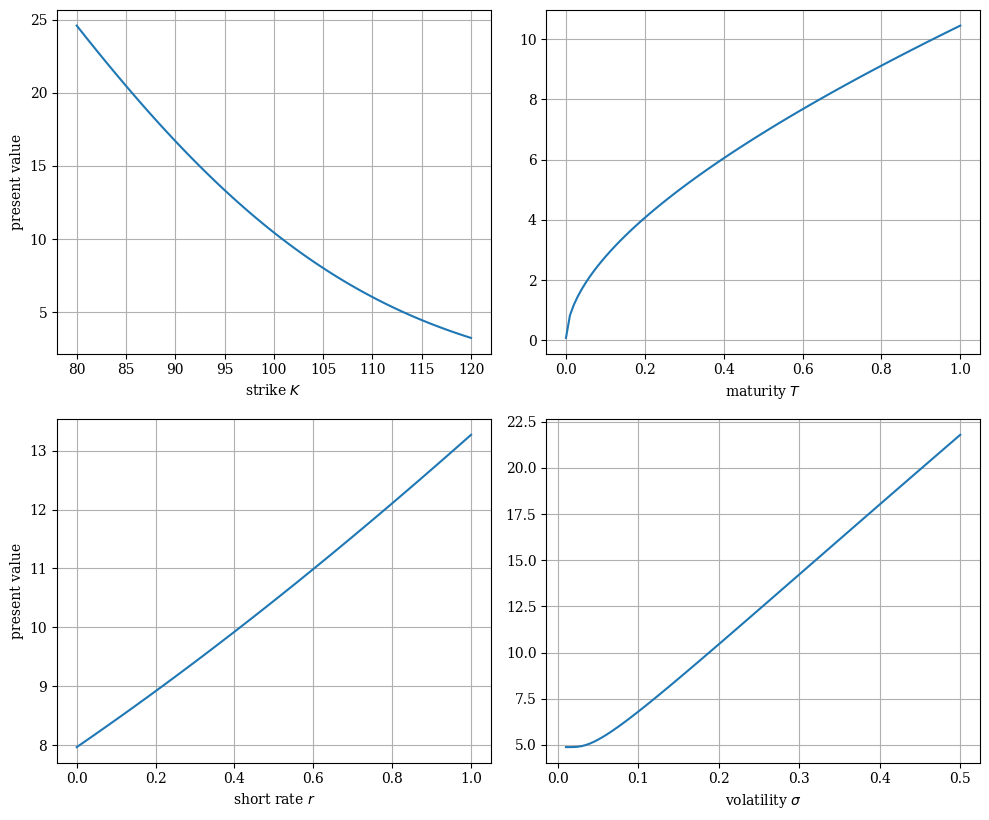

In [7]:
plot = plot_values(BSM_call_value)